## From last time...

Now you all have experience with calculating portfolios that minimize some objective. What we want to do now is simulate such portfolios and ask the question- do the special mean-varaince, min-variance, etc. portfolios that we have actually perform better than randomly selected portfolios in practice?

## Answering the question!

What we want to do now is simulate many different kinds of portfolios over some time horizon and see for ourself if optimization seems to be doing something good for us!


### Part 1

We are going to simulate the following portfolios:

* 1/n
* random weights
* single stock
* mean-variance
* minimum-variance

1. Create five sets of 20 stocks each (randomly select the stocks) and gather data for each set from 2016-2020 (or whenever works)
2. For each set of stocks, make the following:
    * 1/n portfolio
    * 10 random weights portfolios
    * minimum variance portfolio
    * mean-variance portfolio
    * max-sharpe portfolio
For these profolios use historical mean returns and the historical covariance matrix.
3. For each subset of stocks, plot the respective portfolios and document what do you see



In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import random

In [12]:
#This will be the five sets of 20 stocks each

pkl_path = '/Users/zakdjahed/Desktop/Pkl Files/S&P500_Data.pkl'

df = pd.read_pickle(pkl_path)

df.head()

tickers = df.columns.get_level_values(1).to_list()
print(tickers)


['A', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APO', 'APTV', 'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBY', 'BDX', 'BEN', 'BG', 'BIIB', 'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRO', 'BSX', 'BWA', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COR', 'COST', 'CPAY', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CRWD', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTRA', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DAY', 'DD', 'DE', 'DECK', 'DELL', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DLR', 'DLTR', 'DOC', 'DOV', '

In [2]:

'''
folder_path = "/Users/zakdjahed/Desktop/Pkl Files"

for filename in os.listdir(folder_path):
    if filename.endswith(".pkl"):
        pkl_path = os.path.join(folder_path, filename)
        try:
            df = pd.read_pickle(pkl_path)
            # Save the CSV with the index (date) included
            csv_filename = filename.replace(".pkl", ".csv")
            csv_path = os.path.join(folder_path, csv_filename)
            df.to_csv(csv_path, index=True)
            print(f"Converted {filename} to {csv_filename}")
        except Exception as e:
            print(f"Failed to convert {filename}: {e}")
'''


Converted OEX.pkl to OEX.csv
Converted RUT.pkl to RUT.csv
Converted Market_Data.pkl to Market_Data.csv
Converted S&P500_Data.pkl to S&P500_Data.csv
Converted Market_Cap.pkl to Market_Cap.csv


In [13]:
df = pd.read_pickle(pkl_path)

In [14]:
pkl_path

'/Users/zakdjahed/Desktop/Pkl Files/S&P500_Data.pkl'

In [15]:
df['Close'].head()


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,AON,AOS,APA,APD,APH,APO,...,UNH,UNP,UPS,URI,USB,V,VICI,VLO,VMC,VRSK,VRSN,VRTX,VST,VTR,VTRS,VZ,WAB,WAT,WBA,WBD,WDAY,WDC,WEC,WELL,WFC,WM,WMB,WMT,WRB,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-04,115.582756,126.405251,88.933945,139.149994,101.045959,33.186359,242.118500,485.339996,136.015411,45.076885,155.679260,296.839996,67.674828,69.613197,20.197657,39.292595,33.837643,122.549225,115.012604,105.239998,146.840118,526.460022,97.447624,108.879883,84.023392,9.514815,92.300003,115.359138,199.945618,175.976196,196.275818,159.331497,17.697500,357.670013,198.248840,50.030846,13.476460,243.253464,30.917866,43.250126,...,330.080750,185.846680,142.408020,223.874420,38.867508,211.141418,20.106192,47.520809,141.795364,197.835236,213.580002,229.429993,17.343218,40.618176,15.924833,45.806213,70.969894,250.149994,32.867435,30.629999,228.080002,52.230000,79.065369,54.850693,26.911980,107.719170,16.255178,46.071335,26.302166,282.794037,192.866302,27.712090,104.916153,57.854469,34.851482,95.177696,98.271187,144.150223,378.130005,158.001343
2021-01-05,116.527763,127.968079,89.853569,148.300003,102.296188,33.319485,243.496887,485.690002,138.446594,45.953667,155.246185,301.700012,67.345924,69.519295,20.875547,39.356281,34.402672,122.586319,114.247375,105.419998,156.749390,543.650024,96.681236,109.089119,86.663925,9.581700,92.769997,116.158211,200.915955,174.947159,197.267929,160.925507,17.875626,359.829987,198.006546,50.355602,14.762973,256.123566,31.451923,43.585129,...,325.641907,188.126160,140.425766,229.645569,38.993919,207.990173,20.367203,48.876595,142.801773,196.947845,206.500000,228.580002,17.921932,41.103378,15.546897,45.596062,71.858841,255.429993,32.676895,31.520000,225.360001,53.060001,78.811661,55.171253,27.664064,108.075661,16.748495,45.826080,26.075354,288.191010,191.256699,27.973917,108.145088,57.290531,36.531078,95.063118,98.280479,146.644348,380.570007,159.102417
2021-01-06,119.723236,123.660492,89.077408,142.770004,102.083199,34.783871,246.159134,466.309998,139.070679,47.815659,154.702560,302.869995,67.905945,70.074211,21.709873,40.875591,36.644535,127.966599,116.629128,101.529999,168.457794,540.390015,99.169716,111.571442,87.853622,9.849254,90.330002,121.079346,205.758865,184.985016,192.066055,156.919006,17.866875,349.899994,200.410141,52.090721,15.365169,262.998566,32.233780,43.005680,...,339.307922,192.062607,140.008469,250.097885,41.303047,206.157639,20.416145,49.968048,155.565552,195.085358,199.509995,226.649994,18.346918,41.909153,15.881886,46.148693,77.319572,262.470001,34.161488,34.250000,220.000000,53.410000,79.808952,57.504192,29.621290,110.467735,17.387375,46.112202,26.970451,291.280670,192.866302,28.117510,108.792847,58.559357,37.463245,99.073006,98.819122,150.823151,394.820007,161.439758
2021-01-07,122.908958,127.880165,90.030769,151.270004,103.074112,34.460564,248.481567,477.739990,144.948334,47.390827,155.577896,315.200012,65.994720,68.204544,21.492599,40.648148,37.264233,129.256027,117.011765,102.809998,177.020142,558.359985,99.241852,114.510277,91.461388,9.765646,95.160004,121.225525,206.438141,187.220856,194.398834,158.108002,18.498125,365.019989,200.196930,52.730961,15.611525,258.753815,32.695679,42.462448,...,344.747864,194.735779,138.234909,258.023407,42.128937,207.311447,20.310108,50.880428,156.775192,195.972717,200.000000,232.899994,18.247458,41.103378,15.907656,46.044846,80.045059,260.790009,35.931881,34.400002,226.210007,54.740002,77.210747,56.364441,30.291834,110.739784,17.419724,46.109062,26.735538,301.104187,194.333847,28.387791,107.713257,57.413902,37.757168,103.569839,98.066887,149.929062,409.100006,161.294876
2021-01-08,123.785797,128.983917,90.503235,149.770004,103.361183,34.650742,249.387909,485.100006,146.000977,47.517372,157.604950,319.850006,66.67

In [16]:
path = '/Users/zakdjahed/Desktop/Pkl Files/S&P500_Data.pkl'

df = pd.read_pickle(path)

In [73]:
#tickers = df.columns.get_level_values(1).to_list()
#type(tickers)
#print(tickers)

['A', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APO', 'APTV', 'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBY', 'BDX', 'BEN', 'BG', 'BIIB', 'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRO', 'BSX', 'BWA', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COR', 'COST', 'CPAY', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CRWD', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTRA', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DAY', 'DD', 'DE', 'DECK', 'DELL', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DLR', 'DLTR', 'DOC', 'DOV', '

In [17]:
dates = df.index.get_level_values(0).to_list()
print(dates)

[Timestamp('2021-01-04 00:00:00'), Timestamp('2021-01-05 00:00:00'), Timestamp('2021-01-06 00:00:00'), Timestamp('2021-01-07 00:00:00'), Timestamp('2021-01-08 00:00:00'), Timestamp('2021-01-11 00:00:00'), Timestamp('2021-01-12 00:00:00'), Timestamp('2021-01-13 00:00:00'), Timestamp('2021-01-14 00:00:00'), Timestamp('2021-01-15 00:00:00'), Timestamp('2021-01-19 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-21 00:00:00'), Timestamp('2021-01-22 00:00:00'), Timestamp('2021-01-25 00:00:00'), Timestamp('2021-01-26 00:00:00'), Timestamp('2021-01-27 00:00:00'), Timestamp('2021-01-28 00:00:00'), Timestamp('2021-01-29 00:00:00'), Timestamp('2021-02-01 00:00:00'), Timestamp('2021-02-02 00:00:00'), Timestamp('2021-02-03 00:00:00'), Timestamp('2021-02-04 00:00:00'), Timestamp('2021-02-05 00:00:00'), Timestamp('2021-02-08 00:00:00'), Timestamp('2021-02-09 00:00:00'), Timestamp('2021-02-10 00:00:00'), Timestamp('2021-02-11 00:00:00'), Timestamp('2021-02-12 00:00:00'), Timestamp('20

In [22]:
#Create five sets of 20 stocks each (randomly select the stocks) and gather data for each set from 2021-2025 (or whenever works)

#Filter df to only include rows between 2021 and 2025
# Ensure index is datetime
df.index = pd.to_datetime(df.index.get_level_values(0))

#Filter the DataFrame
df_filtered = df.loc[(df.index >= '2021-01-04') & (df.index <= '2025-02-07')]

#Get unique tickers from the columns (assuming level 1 is ticker name)
tickers = df.columns.get_level_values(1).unique().to_list()

#Randomly select 5 sets of 20 tickers
random.seed(42)  # for reproducibility
random.shuffle(tickers)

sets_of_20 = [tickers[i:i+20] for i in range(0, 100, 20)]  # creates 5 sets of 20

#For each set, collect the closing price data
close_data_sets = []

for i, ticker_set in enumerate(sets_of_20):
    close_columns = [('Close', ticker) for ticker in ticker_set]
    subset_df = df_filtered.loc[:, close_columns]
    close_data_sets.append(subset_df)

    print(f"Set {i+1} shape: {subset_df.shape}")

Set 1 shape: (1030, 20)
Set 2 shape: (1030, 20)
Set 3 shape: (1030, 20)
Set 4 shape: (1030, 20)
Set 5 shape: (1030, 20)


In [23]:
df_filtered.head()

Price            Close                         ...   Volume                 
Ticker               A        AAPL       ABBV  ...      ZBH    ZBRA      ZTS
Date                                           ...                          
2021-01-04  115.582756  126.405251  88.933945  ...  1265870  432600  1805900
2021-01-05  116.527763  127.968079  89.853569  ...   998894  374700  1358600
2021-01-06  119.723236  123.660492  89.077408  ...  1424799  419500  2139800
2021-01-07  122.908958  127.880165  90.030769  ...  1237648  379900  1710700
2021-01-08  123.785797  128.983917  90.503235  ...  1259072  348500  1475900

[5 rows x 2460 columns]

In [24]:
#1/n portfolio
#For these profolios use historical mean returns and the historical covariance matrix.

portfolio_results = []

for i, price_df in enumerate(close_data_sets):
     print(f"\nProcessing Portfolio Set {i+1}")

     #Calculate daily returns
     returns_df = price_df.pct_change().dropna()

     #Historical mean returns
     mean_returns = returns_df.mean()

     #covariance matrix
     cov_matrix = returns_df.cov()

     #Apply 1/n weighting to portfolio
     n = len(returns_df.columns)
     weights = np.array([1/n] * n)

     #Portfolio return time series
     portfolio_returns = pd.Series(np.dot(returns_df, weights), index=returns_df.index)

     #performance metrics
     avg_daily_returns = portfolio_returns.mean()
     annualized_return = avg_daily_returns * 252
     annualized_volatility = portfolio_returns.std() * np.sqrt(252)
     sharpe_ratio = annualized_return/annualized_volatility

     portfolio_results.append({
          'returns' : portfolio_returns,
          'mean_returns': avg_daily_returns,
          'yearly_returns' : annualized_return,
          'sharpe': sharpe_ratio,
          'weights': weights,
          'cov_matrix': cov_matrix,
          'volatility': annualized_volatility

     })

     
    


Processing Portfolio Set 1

Processing Portfolio Set 2

Processing Portfolio Set 3

Processing Portfolio Set 4

Processing Portfolio Set 5


In [25]:
#random weights

random_weight_results = []

for i, price_df in enumerate(close_data_sets):
    print(f"\nProcessing Portfolio Set {i+1}")
    
    #Daily returns, historical means, and covariance matrix don't need to be recalculated

    #Now just do random weights
    #random_weights = np.array([1/np.random()] * n)
    unnormalized_random_weights = np.random.rand(n)
    random_weights = unnormalized_random_weights / np.sum(unnormalized_random_weights)
    
    #Calculate portfolio daily return time series
    random_portfolio_returns = pd.Series(np.dot(returns_df, random_weights), index = returns_df.index)

    #Performance metrics
    random_avg_daily_return = np.mean(random_portfolio_returns)
    random_annual_return = random_avg_daily_return * 252
    random_annual_volatility = np.std(random_portfolio_returns) * np.sqrt(252)
    random_sharpe_ratio = random_annual_return / random_annual_volatility

    print(f"Annualized Return: {random_annual_return:.4f}")
    print(f"Annualized Volatility: {random_annual_volatility:.4f}")
    print(f"Sharpe Ratio: {random_sharpe_ratio:.4f}")

    # Step 6: Store results
    random_weight_results.append({
        'returns': random_portfolio_returns,
        'mean_returns': avg_daily_returns,
        'cov_matrix': cov_matrix,
        'weights': random_weights,
        'annual_return': random_annual_return,
        'volatility': random_annual_volatility,
        'sharpe': random_sharpe_ratio
    })
    


Processing Portfolio Set 1
Annualized Return: 0.1884
Annualized Volatility: 0.1830
Sharpe Ratio: 1.0297

Processing Portfolio Set 2
Annualized Return: 0.1715
Annualized Volatility: 0.1775
Sharpe Ratio: 0.9666

Processing Portfolio Set 3
Annualized Return: 0.1714
Annualized Volatility: 0.1558
Sharpe Ratio: 1.1003

Processing Portfolio Set 4
Annualized Return: 0.2031
Annualized Volatility: 0.1541
Sharpe Ratio: 1.3178

Processing Portfolio Set 5
Annualized Return: 0.1755
Annualized Volatility: 0.1751
Sharpe Ratio: 1.0023


In [26]:
#Single stock 

single_stock_results = []

for i, price_df in enumerate(close_data_sets):
    print(f"\nProcessing Single Stock Portfolio Set {i+1}")

    #Calculate daily returns for the whole set
    single_returns_df = price_df.pct_change().dropna()

    # Randomly select one column (stock)
    tickers_in_set = single_returns_df.columns.get_level_values(1).to_list()
    selected_ticker = random.choice(tickers_in_set)

    #Extract that single stock's return series
    selected_column = ('Close', selected_ticker)
    single_stock_returns = single_returns_df[selected_column]

    #Performance metrics
    single_avg_daily_return = single_stock_returns.mean()
    single_annual_return = single_avg_daily_return * 252
    single_annual_volatility = single_stock_returns.std() * np.sqrt(252)
    single_sharpe_ratio = single_annual_return / single_annual_volatility

    print(f"Selected Ticker: {selected_ticker}")
    print(f"Annualized Return: {single_annual_return:.4f}")
    print(f"Annualized Volatility: {single_annual_volatility:.4f}")
    print(f"Sharpe Ratio: {single_sharpe_ratio:.4f}")

    #Store results
    single_stock_results.append({
        'ticker': selected_ticker,
        'returns': single_stock_returns,
        'annual_return': single_annual_return,
        'volatility': single_annual_volatility,
        'sharpe': single_sharpe_ratio
    })



Processing Single Stock Portfolio Set 1
Selected Ticker: CLX
Annualized Return: -0.0087
Annualized Volatility: 0.2571
Sharpe Ratio: -0.0340

Processing Single Stock Portfolio Set 2
Selected Ticker: EQT
Annualized Return: 0.4484
Annualized Volatility: 0.4660
Sharpe Ratio: 0.9624

Processing Single Stock Portfolio Set 3
Selected Ticker: LYV
Annualized Return: 0.2464
Annualized Volatility: 0.3608
Sharpe Ratio: 0.6830

Processing Single Stock Portfolio Set 4
Selected Ticker: CHTR
Annualized Return: -0.0902
Annualized Volatility: 0.3498
Sharpe Ratio: -0.2579

Processing Single Stock Portfolio Set 5
Selected Ticker: IPG
Annualized Return: 0.1196
Annualized Volatility: 0.2864
Sharpe Ratio: 0.4176


In [27]:
#mean-variance
#Maximizes the sharpe ratio
from scipy.optimize import minimize

mean_variance_results = []

risk_free_rate = 0.0  # Can set this to 0.01 or actual risk-free rate if needed

for i, price_df in enumerate(close_data_sets):
    print(f"\nProcessing Mean-Variance Portfolio Set {i+1}")

    #Calculate daily returns
    mv_returns_df = price_df.pct_change().dropna()

    #Historical mean returns & covariance
    mv_mean_returns = mv_returns_df.mean()
    mv_cov_matrix = mv_returns_df.cov()

    num_assets = len(mv_returns_df.columns)

    #Define objective: negative Sharpe ratio
    def neg_sharpe(weights):
        portfolio_return = np.dot(weights, mv_mean_returns)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(mv_cov_matrix, weights)))
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
        return -sharpe_ratio

    #Constraints: sum of weights = 1, weights >= 0
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = tuple((0, 1) for _ in range(num_assets))
    initial_guess = np.array([1 / num_assets] * num_assets)

    #Optimize
    result = minimize(neg_sharpe, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    if result.success:
        mv_optimal_weights = result.x
        mv_portfolio_returns = mv_portfolio_returns = pd.Series(np.dot(mv_returns_df, mv_optimal_weights), index=mv_returns_df.index)

        #Performance metrics
        mv_avg_daily_return = np.mean(mv_portfolio_returns)
        mv_annual_return = mv_avg_daily_return * 252
        mv_annual_volatility = np.std(mv_portfolio_returns) * np.sqrt(252)
        mv_sharpe_ratio = mv_annual_return / mv_annual_volatility

        print(f"Annualized Return: {mv_annual_return:.4f}")
        print(f"Annualized Volatility: {mv_annual_volatility:.4f}")
        print(f"Sharpe Ratio: {mv_sharpe_ratio:.4f}")
    else:
        print("Optimization failed.")
        mv_optimal_weights = None
        mv_portfolio_returns = None
        mv_annual_return = mv_annual_volatility = mv_sharpe_ratio = None

    #Store results
    mean_variance_results.append({
        'weights': mv_optimal_weights,
        'returns': mv_portfolio_returns,
        'mean_returns': mv_mean_returns,
        'cov_matrix': mv_cov_matrix,
        'annual_return': mv_annual_return,
        'volatility': mv_annual_volatility,
        'sharpe': mv_sharpe_ratio
    })



Processing Mean-Variance Portfolio Set 1
Annualized Return: 0.3390
Annualized Volatility: 0.2420
Sharpe Ratio: 1.4008

Processing Mean-Variance Portfolio Set 2
Annualized Return: 0.2951
Annualized Volatility: 0.1720
Sharpe Ratio: 1.7160

Processing Mean-Variance Portfolio Set 3
Annualized Return: 0.4379
Annualized Volatility: 0.2428
Sharpe Ratio: 1.8036

Processing Mean-Variance Portfolio Set 4
Annualized Return: 0.2135
Annualized Volatility: 0.1709
Sharpe Ratio: 1.2493

Processing Mean-Variance Portfolio Set 5
Annualized Return: 0.3456
Annualized Volatility: 0.1734
Sharpe Ratio: 1.9934


In [28]:
#minimum variance

min_variance_results = []

for i, price_df in enumerate(close_data_sets):
    print(f"\nProcessing Minimum Variance Portfolio Set {i+1}")

    #Calculate daily returns
    minvar_returns_df = price_df.pct_change().dropna()

    #Covariance matrix
    minvar_cov_matrix = minvar_returns_df.cov()
    num_assets = len(minvar_returns_df.columns)

    #Define objective: portfolio volatility
    def portfolio_volatility(weights):
        return np.sqrt(np.dot(weights.T, np.dot(minvar_cov_matrix, weights)))

    #Constraints and bounds
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = tuple((0, 1) for _ in range(num_assets))
    initial_guess = np.array([1 / num_assets] * num_assets)

    #Optimize
    result = minimize(portfolio_volatility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    if result.success:
        minvar_optimal_weights = result.x
        minvar_portfolio_returns = pd.Series(np.dot(minvar_returns_df, minvar_optimal_weights), index = minvar_returns_df.index)

        #Performance metrics
        minvar_avg_daily_return = np.mean(minvar_portfolio_returns)
        minvar_annual_return = minvar_avg_daily_return * 252
        minvar_annual_volatility = np.std(minvar_portfolio_returns) * np.sqrt(252)
        minvar_sharpe_ratio = minvar_annual_return / minvar_annual_volatility

        print(f"Annualized Return: {minvar_annual_return:.4f}")
        print(f"Annualized Volatility: {minvar_annual_volatility:.4f}")
        print(f"Sharpe Ratio: {minvar_sharpe_ratio:.4f}")
    else:
        print("Optimization failed.")
        minvar_optimal_weights = None
        minvar_portfolio_returns = None
        minvar_annual_return = minvar_annual_volatility = minvar_sharpe_ratio = None

    # Step 7: Store results
    min_variance_results.append({
        'weights': minvar_optimal_weights,
        'returns': minvar_portfolio_returns,
        'cov_matrix': minvar_cov_matrix,
        'annual_return': minvar_annual_return,
        'volatility': minvar_annual_volatility,
        'sharpe': minvar_sharpe_ratio
    })



Processing Minimum Variance Portfolio Set 1
Annualized Return: 0.0834
Annualized Volatility: 0.1441
Sharpe Ratio: 0.5784

Processing Minimum Variance Portfolio Set 2
Annualized Return: 0.1237
Annualized Volatility: 0.1347
Sharpe Ratio: 0.9185

Processing Minimum Variance Portfolio Set 3
Annualized Return: 0.0951
Annualized Volatility: 0.1447
Sharpe Ratio: 0.6577

Processing Minimum Variance Portfolio Set 4
Annualized Return: 0.0995
Annualized Volatility: 0.1409
Sharpe Ratio: 0.7063

Processing Minimum Variance Portfolio Set 5
Annualized Return: 0.1540
Annualized Volatility: 0.1212
Sharpe Ratio: 1.2711


In [103]:
type(portfolio_results)

list

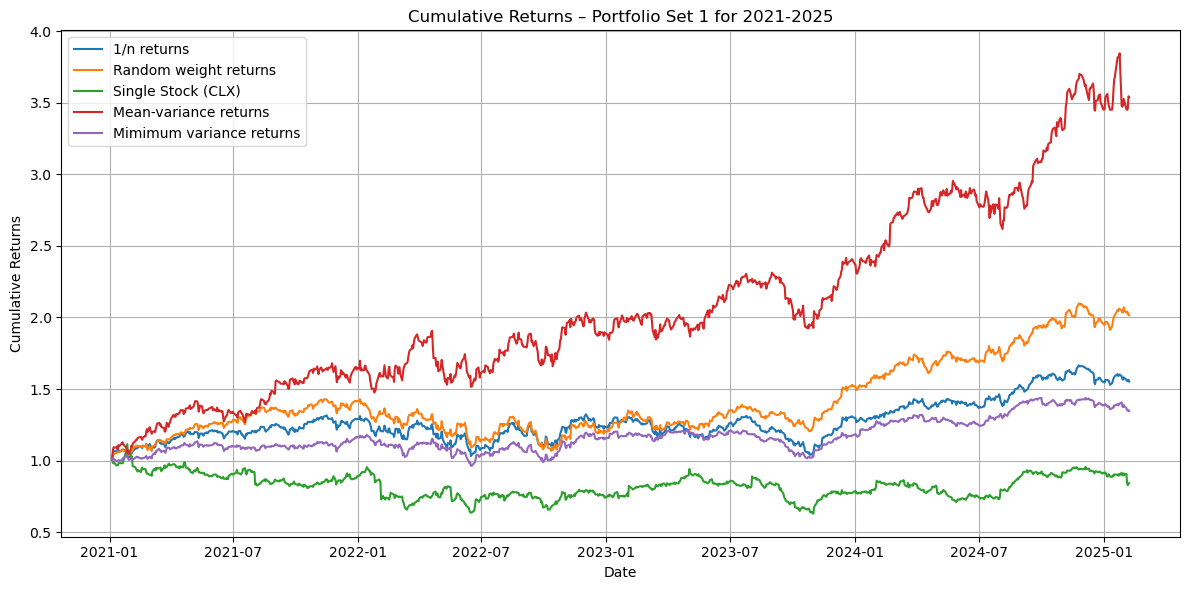

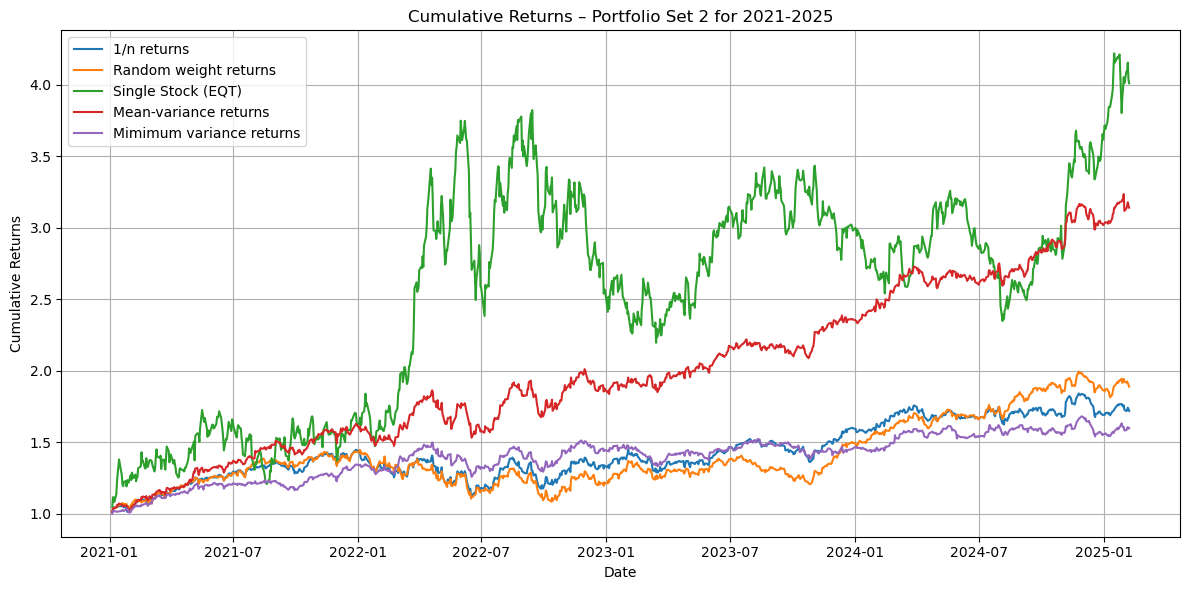

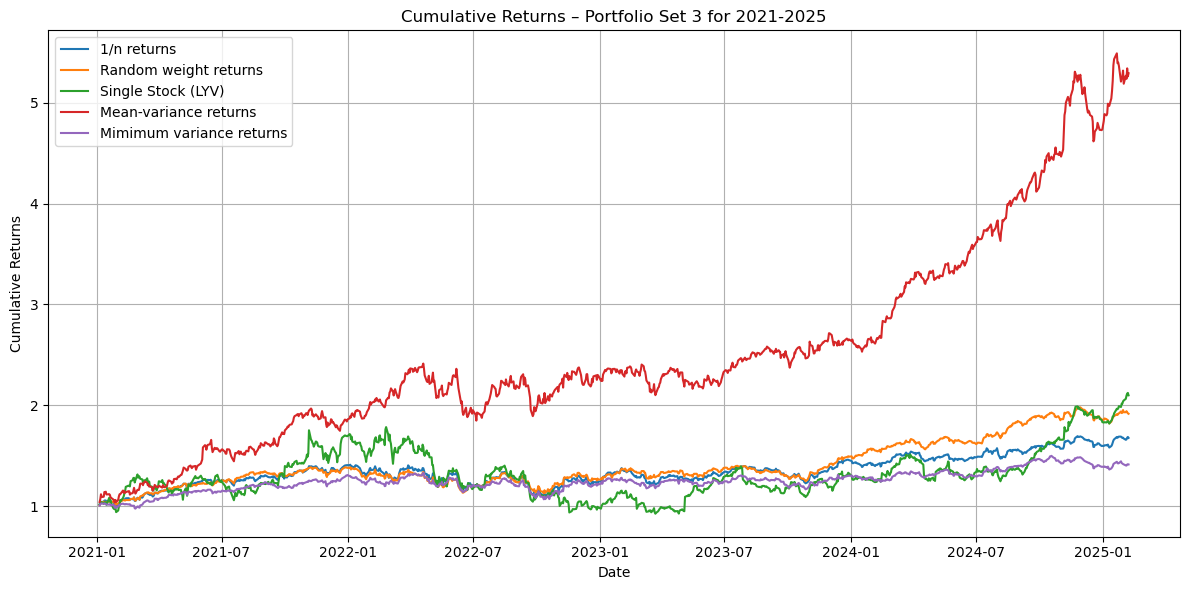

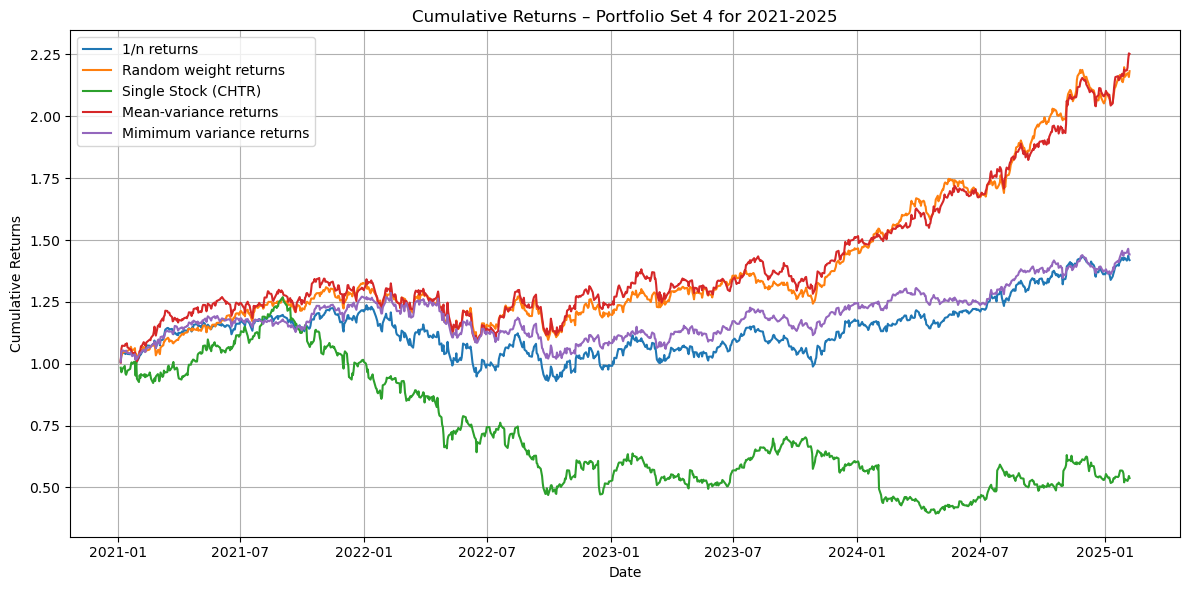

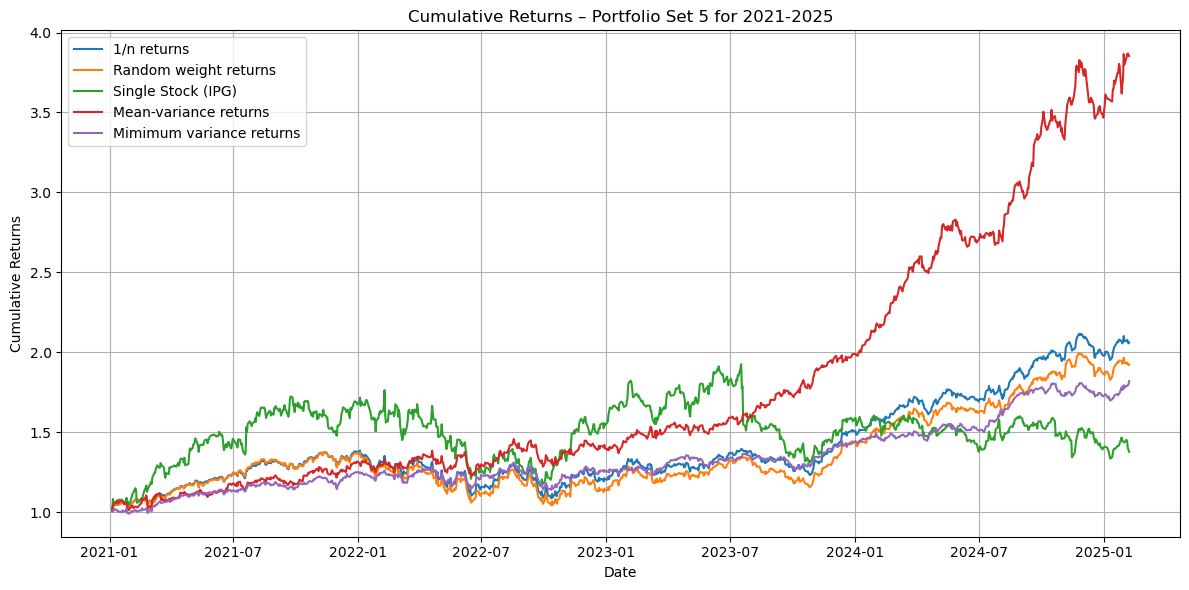

In [29]:
#For each subset of stocks, plot the respective portfolios and document what do you see

#For each subset (sets 1 to 5)
for i in range(5):
    plt.figure(figsize=(12,6))
    #For each strategy, we take the daily returns and compute cumulative returns with (1 + returns).cumprod()
    
    #1/n
    eq_cum_returns = (1+portfolio_results[i]['returns']).cumprod()
    plt.plot(eq_cum_returns, label = '1/n returns')

    #Random weights
    rand_cum_returns = (1+random_weight_results[i]['returns']).cumprod()
    plt.plot(rand_cum_returns, label = 'Random weight returns')

    #Single stock
    single_cum_returns = (1 + single_stock_results[i]['returns']).cumprod()
    plt.plot(single_cum_returns, label = f"Single Stock ({single_stock_results[i]['ticker']})")

    #Mean-variance
    mean_var_returns = (1 + mean_variance_results[i]['returns']).cumprod()
    plt.plot(mean_var_returns, label = 'Mean-variance returns')

    #minimum variance
    min_var_returns = (1 + min_variance_results[i]['returns']).cumprod()
    plt.plot(min_var_returns, label = 'Mimimum variance returns')

    #Plot appearance
    plt.title(f"Cumulative Returns – Portfolio Set {i+1} for 2021-2025")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()